# Simulação estocastica

## Imports/Libs

In [82]:
from collections import Counter
import math

## Uniform Generator(0,1)

In [83]:
class Uniform01:

    anterior = 2222
    
    def MCL(self, modulo=2**31, a=1103515245, c=12345, semente=None):
        if semente != None:
            self.anterior = semente
        num_aleatorio = (self.anterior * a + c) % modulo
        self.anterior = num_aleatorio
        return num_aleatorio/modulo

## Poisson distribution

In [84]:
class Poisson:
	
	def __init__(self, P=1, lamb=10):
		self.P = P
		self.lamb = lamb

	# Random Variable
	def random(self, n=0): 
		u01 = Uniform01()

		while True:
			R = u01.MCL()
			self.P = self.P*R
			if self.P < math.e**(-self.lamb):
				return n
			n = n+1
		return -1

	def mean(self):
		return self.lamb

	def median(self):
		return math.floor(self.lamb + 1/3 - 0.02/self.lamb)

	def mode(self):
		return [math.ceil(self.lamb)-1, math.floor(self.lamb)]

	def variance(self):
		return self.lamb

	def skewness(self):
		return self.lamb**(-1/2)

	def kurtosis(self):
		return 3 + 1/self.lamb
	# Falta os Quantiles
  

## Gamma Function

In [85]:
def Gamma(n):
    r = 1
    for i in range(2, n):
        r *= i
    return r

## Weibull Distribution

In [86]:
class Weibull:
    def __init__(self, k=1, lamb=1):
        self.k = k, self.lamb = lamb

    def random(self, k=1, lamb=1):
        u01 = Uniform01()
        return self.lamb * ((-math.log(u01.MCL))**(1/self.k))

    def mean(self):
        return self.lamb * Gamma(1 + 1/self.k)

    def median(self):
        return self.lamb * ((math.log(2))**(1/self.k))

    def mode(self):
        if k > 1:
            return self.lamb * (((self.k - 1)/self.k)**(1/self.k))
        return 0
    
    # def skewness(self):
            

SyntaxError: unexpected EOF while parsing (<ipython-input-86-25c474808af4>, line 21)

## Describe Function

In [42]:
def describe(self, sample):
    n, _, mean_obs, variance_obs, skewness_obs, kurtosis_obs = stats.describe(sample)
    median_obs = np.median(sample)
    mode_obs, weights = stats.mode(sample)
    mode_obs = np.average(mode_obs, weights=weights)
    std_obs = np.sqrt(variance_obs)
    q1_obs = np.quantile(sample, 0.25)
    q3_obs = np.quantile(sample, 0.75)

    return [n, mean_obs, mode_obs, median_obs, variance_obs, std_obs, kurtosis_obs, skewness_obs, q1_obs, q3_obs]

## Plot charts

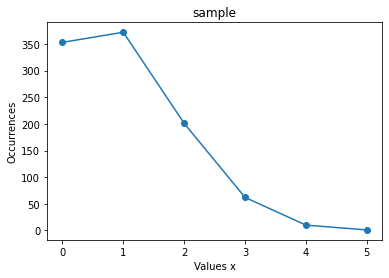

In [43]:
# def generateInPlot(n_sample, sample_size):
# 	for sample_i in range(n_sample):
# 		result = []
# 		for i in range(1, sample_size):
# 			result.append(Poisson(lamb=p_lamb))

# 		# counter occurrences
# 		resultCount = Counter(sorted(result))
# 		# print(resultCount)
# 		x = []
# 		y = []
# 		for i in resultCount:
# 			x.append(i)
# 			y.append(resultCount[i])
# 			# print(i, "->", resultCount[i])

# 		# plot chart
# 		import matplotlib.pyplot as plt
# 		plt.plot(x, y, marker='o')
# 		plt.title('sample')
# 		plt.xlabel('Values x')
# 		plt.ylabel('Occurrences')
# 		plt.show()

# generateInPlot(1, 1000)
# generateInPlot(10, 10000)
# generateInPlot(10, 100000)

In [44]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Table(header=dict(values=['A Scores', 'B Scores']),
#                  cells=dict(values=[[100, 90, 80, 90], [95, 85, 75, 95]]))
#                      ])
# fig.show()